<a href="https://colab.research.google.com/github/anecula/AWS-CostEstimation-Python/blob/master/Copy_of_Bucharest_AI_Keras_Walkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Keras is one of the official frontends for using Tensorflow. It is easy to use, yet powerful enough to express also complicated use cases.

In [0]:
!pip uninstall keras -y
!pip uninstall tensorflow -y
!pip install keras==2.2.2 -q
!pip install tensorflow==1.11.0 -q
!pip install tensorflowjs -q

Uninstalling Keras-2.1.6:
  Successfully uninstalled Keras-2.1.6
Uninstalling tensorflow-1.12.0rc1:
  Successfully uninstalled tensorflow-1.12.0rc1
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.
keras 2.2.2 has requirement keras-applications==1.0.4, but you'll have keras-applications 1.0.6 which is incompatible.
keras 2.2.2 has requirement keras-preprocessing==1.0.2, but you'll have keras-preprocessing 1.0.5 which is incompatible.


In [0]:
import keras
print(keras.__version__)

Using TensorFlow backend.


2.2.2


# A first look at a creating models using Keras

The problem we are trying to solve here is to classify grayscale images of handwritten digits (28 pixels by 28 pixels), into their 10 
categories (0 to 9). The dataset we will use is the MNIST dataset, a classic dataset in the machine learning community, which has been 
around for almost as long as the field itself and has been very intensively studied. It's a set of 60,000 training images, plus 10,000 test 
images, assembled by the National Institute of Standards and Technology (the NIST in MNIST) in the 1980s. You can think of "solving" MNIST 
as the "Hello World" of deep learning -- it's what you do to verify that your algorithms are working as expected. As you become a machine 
learning practitioner, you will see MNIST come up over and over again, in scientific papers, blog posts, and so on.

The MNIST dataset comes pre-loaded in Keras, in the form of a set of four Numpy arrays:

In [0]:
from keras.datasets import mnist

(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


`train_images` and `train_labels` form the "training set", the data that the model will learn from. The model will then be tested on the 
"test set", `test_images` and `test_labels`. Our images are encoded as Numpy arrays, and the labels are simply an array of digits, ranging 
from 0 to 9. There is a one-to-one correspondence between the images and the labels.

Let's have a look at the training data:

In [0]:
train_images.shape

(60000, 28, 28)

In [0]:
len(train_labels)

60000

In [0]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

Let's have a look at the training labels:

How are the labels distributed in the test set ?

<Container object of 10 artists>

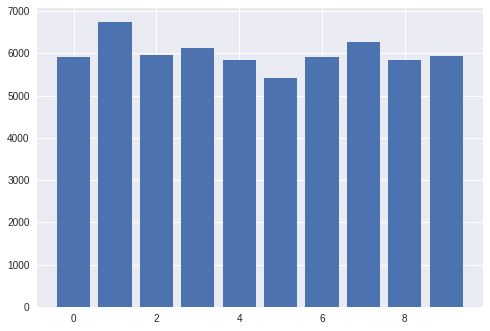

In [0]:
import numpy as np
from matplotlib import pyplot as plt

plt.bar(x = range(10), height = np.bincount(train_labels))

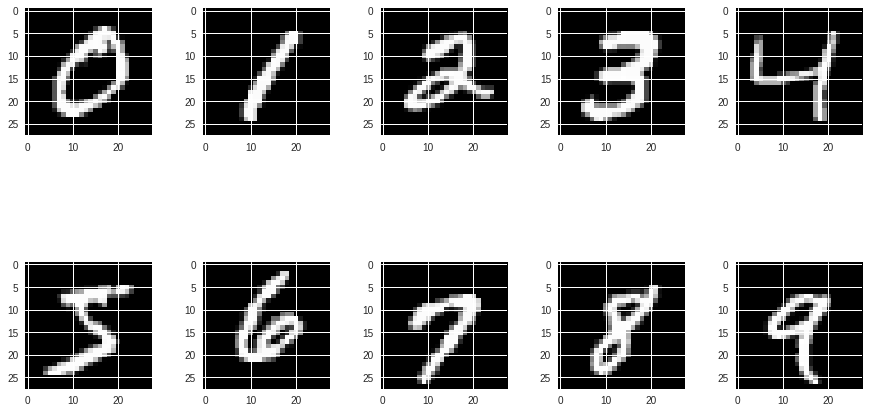

In [0]:
import matplotlib.pyplot as plt

%matplotlib inline

fig = plt.figure(figsize=(15, 8))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for label in range(10):
  ax = fig.add_subplot(2, 5, label+1)
  pos = [x for x in range(len(train_labels)) if train_labels[x] == label][0]
  X = train_images[pos]
  X = X.reshape([28, 28])
  plt.gray()
  plt.imshow(X)

In [0]:
test_images.shape

(10000, 28, 28)

In [0]:
len(test_labels)

10000


Before training, we will preprocess our data by reshaping it into the shape that the network expects, and scaling it so that all values are in  the `[0, 1]` interval. 

In [0]:
train_images = train_images.astype('float32') / 255
test_images = test_images.astype('float32') / 255

Our workflow will be as follow: first we will present our neural network with the training data, `train_images` and `train_labels`. The 
network will then learn to associate images and labels. Finally, we will ask the network to produce predictions for `test_images`, and we 
will verify if these predictions match the labels from `test_labels`.

Let's build our network -- again, remember that you aren't supposed to understand everything about this example just yet.

In [0]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28)))
network.add(layers.Dense(10, activation='softmax'))

Here our network consists of a sequence of  `Dense` layers, which are densely-connected (also called "fully-connected") neural layers. 
The second (and last) layer is a 10-way "softmax" layer, which means it will return an array of 10 probability scores (summing to 1). Each 
score will be the probability that the current digit image belongs to one of our 10 digit classes.

To make our network ready for training, we need to pick three more things, as part of "compilation" step:

* A loss function: the is how the network will be able to measure how good a job it is doing on its training data, and thus how it will be 
able to steer itself in the right direction.
* An optimizer: this is the mechanism through which the network will update itself based on the data it sees and its loss function.
* Metrics to monitor during training and testing. Here we will only care about accuracy (the fraction of the images that were correctly 
classified).

The exact purpose of the loss function and the optimizer will be made clear throughout the next two chapters.

In [0]:
network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [0]:
network.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


We are now ready to train our network, which in Keras is done via a call to the `fit` method of the network: 
we "fit" the model to its training data.

In [0]:
network.fit(train_images, train_labels, epochs=3, batch_size=16)

Epoch 1/3
60000/60000 [==============================] - 4s 70us/step - loss: 0.9470 - acc: 0.8248
Epoch 2/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.8702 - acc: 0.8331
Epoch 3/3
60000/60000 [==============================] - 4s 68us/step - loss: 0.8079 - acc: 0.8398


Two quantities are being displayed during training: the "loss" of the network over the training data, and the accuracy of the network over 
the training data.

We quickly reach an accuracy of about 0.92 (i.e. 92%) on the training data. Now let's check that our model performs well on the test set too:

In [0]:
test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

10000/10000 [==============================] - 0s 25us/step
test_acc: 0.8536



Our test set accuracy turns out to be 92% -- that's almost the same as the training set accuracy. 
If there would be a gap between training accuracy and test accuracy, we would speak of "overfitting", 
the fact that machine learning models tend to perform worse on new data than on their training data. 


This concludes our very first example -- you just saw how we could build and a train a neural network to classify handwritten digits, in  less than 20 lines of Python code. 

Let's add more layers to the network and fit the model again.


In [0]:
network = models.Sequential()
network.add(layers.Flatten(input_shape=(28, 28)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=16)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 18s 303us/step - loss: 0.8780 - acc: 0.7905
Epoch 2/5
60000/60000 [==============================] - 18s 306us/step - loss: 0.3701 - acc: 0.8960
Epoch 3/5
60000/60000 [==============================] - 18s 299us/step - loss: 0.3199 - acc: 0.9077
Epoch 4/5
60000/60000 [==============================] - 18s 301us/step - loss: 0.2952 - acc: 0.9151
Epoch 5/5
10000/10000 [==============================] - 1s 65us/step
test_acc: 0.9258


In [0]:
network = models.Sequential()
  
network.add(layers.Flatten(input_shape=(28, 28)))
network.add(layers.Dense(256, activation='relu'))
network.add(layers.Dense(10, activation='softmax'))

network.compile(optimizer='rmsprop',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

network.fit(train_images, train_labels, epochs=5, batch_size=16)

test_loss, test_acc = network.evaluate(test_images, test_labels)

print('test_acc:', test_acc)

Epoch 1/5
60000/60000 [==============================] - 18s 308us/step - loss: 0.8737 - acc: 0.7829
Epoch 2/5
60000/60000 [==============================] - 21s 350us/step - loss: 0.3691 - acc: 0.8960
Epoch 3/5
60000/60000 [==============================] - 20s 334us/step - loss: 0.3200 - acc: 0.9079
Epoch 4/5
60000/60000 [==============================] - 20s 327us/step - loss: 0.2974 - acc: 0.9143
Epoch 5/5
10000/10000 [==============================] - 1s 67us/step
test_acc: 0.9232


TASKs: 

- Please look at the output of the training if this model and tell me if there is overfitting ? 
- We could add a dropout between the two layers (layers.Dropout(0.2)). Is there still overfitting after we added dropout ? Please report the test accuracy.




**Next we build a convolutional network**

In [0]:
img_rows, img_cols = (28, 28)

x_train = train_images.reshape(train_images.shape[0], img_rows, img_cols, 1)
x_test = test_images.reshape(test_images.shape[0], img_rows, img_cols, 1)

network = models.Sequential([
  layers.Conv2D(32, kernel_size=(4, 4), input_shape=(28, 28, 1), activation='relu', padding = 'same'),
  layers.MaxPooling2D(pool_size=(2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(10, activation='softmax')
])   

network.compile(optimizer='adam',
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

network.fit(x_train, train_labels, epochs=1, batch_size=16)

test_loss, test_acc = network.evaluate(x_test, test_labels)

print('test_acc:', test_acc)
  


Epoch 1/1
10000/10000 [==============================] - 5s 496us/step
test_acc: 0.9154


Now we want to save & convert our model so it can be hosted using javascript.

In [0]:
network.save('network.h5py')

In [0]:
!ls -lah | grep network
!rm -rf tfjsmodel
!mkdir tfjsmodel

-rw-r--r-- 1 root root 9.3M Oct 27 08:18 network.h5py


In [0]:
import tensorflowjs as tfjs
tfjs.converters.save_keras_model(network, './tfjsmodel')

In [0]:
!ls -lah ./tfjsmodel

total 3.1M
drwxr-xr-x 2 root root 4.0K Oct 27 08:19 .
drwxr-xr-x 1 root root 4.0K Oct 27 08:19 ..
-rw-r--r-- 1 root root 3.1M Oct 27 08:19 group1-shard1of1
-rw-r--r-- 1 root root 2.8K Oct 27 08:19 model.json


**TASK: Find and display misclassified examples in the test set.**

**TASKS:**
- **Repeat all steps from before for the fashion mnist dataset.**
- **Add layers and dropout.**
- **Report best test accuracy you can achieve.**

In [0]:
from keras.datasets import fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 4s 1us/step


**TASK:**


*   **Download files stored in tfjsmodel directory**
*   **Create a script/website that consumes model in javascript**

**Bunch of links that should be usefull**

* https://js.tensorflow.org/
* https://github.com/tensorflow/tfjs-converter
* https://github.com/tensorflow/tfjs-examples
* https://js.tensorflow.org/tutorials/mnist.html

